## Ejercicio 1

**Enunciado:** Entrena y ajusta un árbol de decisión para el conjunto de datos _moons_.

a. Genera el conjunto de datos usando `make_moons(n_samples=10000, noise=0.4)`.

b. Divídelo en conjunto de entrenamiento y prueba utilizando `train_test_split()`.

c. Utiliza _GridSearchCV_ para buscar buenos hiperparámetros (prueba varios valores de `max_leaf_nodes`, `max_depth` y `min_samples_split`).

d. Entrena el modelo con los mejores hiperparámetros y evalúa la precisión en el conjunto de prueba (se espera alrededor de 85% a 87% de precisión).

In [1]:
#Librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [2]:
# Generar el conjunto de datos
X, y = make_moons(n_samples=10000, noise=0.4)

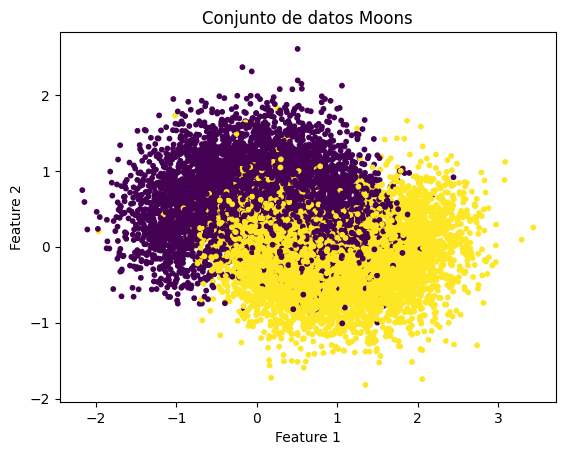

In [3]:
# Visualizar el conjunto de datos
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='viridis')
plt.title('Conjunto de datos Moons')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train

array([[ 1.85822911, -0.03631235],
       [ 0.46945584,  0.95503136],
       [ 1.88251412, -0.23843364],
       ...,
       [-0.97420509,  0.98202423],
       [-0.0499207 ,  0.55527427],
       [ 1.12567224, -0.46811681]])

In [5]:
X_train.shape

(8000, 2)

In [6]:
X_test.shape

(2000, 2)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(random_state=42)

# Definir los parámetros para la búsqueda
param_grid = {
    'max_leaf_nodes': [10, 20, 30, None],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

In [9]:
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'max_depth': None, 'max_leaf_nodes': 20, 'min_samples_split': 2}


In [10]:
# Entrenar el modelo con los mejores hiperparámetros
best_dtree = grid_search.best_estimator_
best_dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)

In [12]:
accuracy = best_dtree.score(X_test, y_test)
print("Precisión:", accuracy)

Precisión: 0.871
